# テキスト　線形モデルC　の内容


In [ ]:
#

In [4]:
# データの読み込み
import pandas as pd
filepath_train = "/home/haruk/workspace/ml-workspace-202507/math/math_data/ogikubo_oneroom_train.csv"
oneroom_train = pd.read_csv(filepath_or_buffer=filepath_train)
oneroom_train.head(n=5)

,name,value,area,age,distance,bath_toilet_separated,autolock
0,フェリーチェ上井草A,6.0,15.12,0,15,1,1
1,メゾン・ド・荻窪,4.5,12.11,40,7,0,0
2,ＪＲ中央線 荻窪駅 3階建 築40年,4.5,12.11,40,6,0,0
3,フェリーチェ上井草A,6.3,15.12,0,15,1,1
4,グローリア初穂阿佐ヶ谷,6.0,16.65,31,15,0,1


In [8]:
oneroom_train.shape

(100, 7)

In [9]:
oneroom_train.name.value_counts()

name
ＪＲ中央線 荻窪駅 4階建 新築            11
ＪＲ中央線 荻窪駅 3階建 築40年           2
フェリーチェ上井草A                   2
ＪＲ中央線 阿佐ヶ谷駅 2階建 築2年          2
メゾンユー 101号室                  2
                            ..
ＪＲ中央線 荻窪駅 2階建 築34年           1
ＪＲ総武線 荻窪駅 5階建 築35年           1
DC阿佐ヶ谷                       1
ＪＲ中央線 西荻窪駅 地下1地上3階建 築29年     1
コンフォートテラス荻窪                  1
Name: count, Length: 83, dtype: int64

In [7]:
oneroom_train.query('name == "フェリーチェ上井草A"')

,name,value,area,age,distance,bath_toilet_separated,autolock
0,フェリーチェ上井草A,6.0,15.12,0,15,1,1
3,フェリーチェ上井草A,6.3,15.12,0,15,1,1


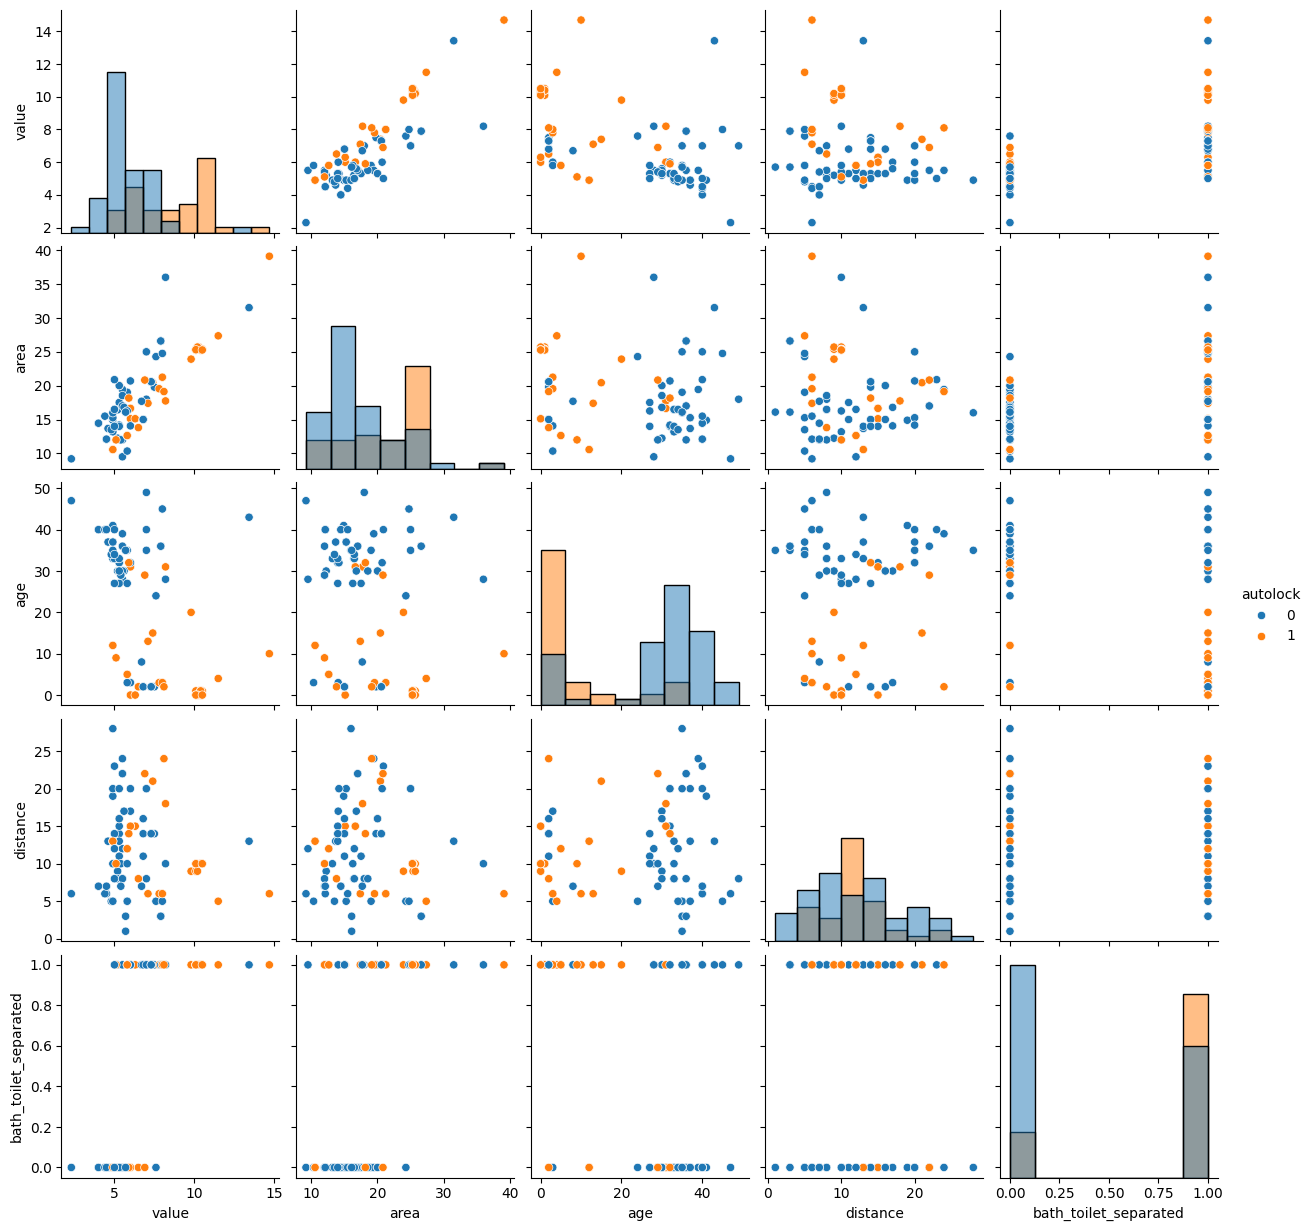

In [ ]:
#データの可視化
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(oneroom_train, hue = "autolock" , diag_kind= "hist")#初めは何も考えずsns.pairplotしていい
plt.show()

In [ ]:
# まず優先順位をつけて注目する図を選ぶ
# 今回はvalue が大切
# とりあえずモデルの数を回す

In [ ]:
# 特徴量選択
feature_name = ["area", "age", "bath_toilet_separated"] 
X_train = oneroom_train[feature_name].values #feature_name変数を作っておいたおかげで[]内に細かく書かなくて便利
y_train = oneroom_train["value"].values

In [13]:
X_train.shape, y_train.shape

((100, 3), (100,))

In [ ]:
# 入力変数の正規化(標標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

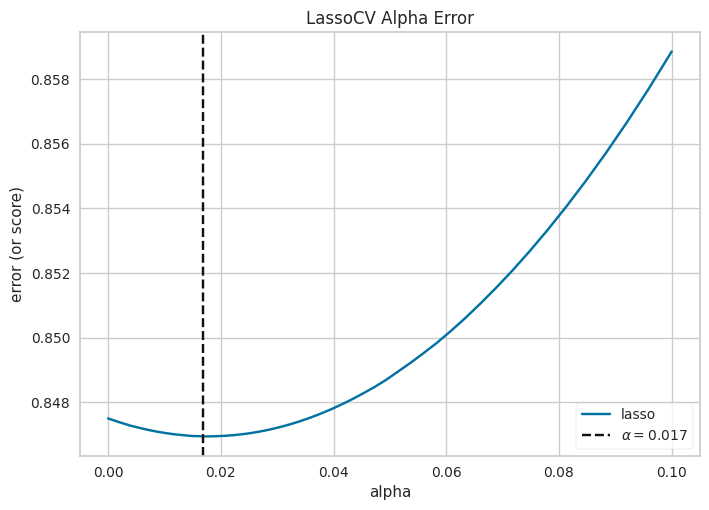

In [ ]:
#ハイパーパラメーターαを求める式
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import LassoCV
import numpy as np
alphas = np.logspace(-10, -1, 500)
model_cv = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model_cv)
visualizer.fit(X_train,y_train)
visualizer.show() 
plt.show()

In [ ]:
# Lasso回帰モデルで回帰モデルを作る。
from sklearn.linear_model import Lasso
model = Lasso(alpha= 0.017)
model.fit(X_train, y_train)


,alpha,0.017
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [ ]:
model.intercept_,model.coef_
# 線形モデルは、式が求まれば読める、必ず読む
# areaが広くなれば1.5万円あがる、ageが1年増えると7千円下がるなど
# 6.9は切片(w0)

(np.float64(6.940299999999999), array([ 1.5948933 , -0.72409219,  0.21732711]))

In [19]:
# 決定係数によるモデルの評価
from sklearn.metrics import r2_score
pred_train = model.predict(X_train)
r2_score(y_true= y_train, y_pred= pred_train)

0.8611372995397126

In [ ]:
# 未知データの入力と出力を作る
X_test = oneroom_test

In [ ]:
# 残差プロット
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model, is_fitted= True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

# また練習

In [1]:
import pandas as pd
filepath_train = "/home/haruk/workspace/ml-workspace-202507/math/math_data/ogikubo_oneroom_train.csv"
oneroom_train = pd.read_csv(filepath_or_buffer=filepath_train)
oneroom_train.head(n=5)

,name,value,area,age,distance,bath_toilet_separated,autolock
0,フェリーチェ上井草A,6.0,15.12,0,15,1,1
1,メゾン・ド・荻窪,4.5,12.11,40,7,0,0
2,ＪＲ中央線 荻窪駅 3階建 築40年,4.5,12.11,40,6,0,0
3,フェリーチェ上井草A,6.3,15.12,0,15,1,1
4,グローリア初穂阿佐ヶ谷,6.0,16.65,31,15,0,1


In [2]:
oneroom_train.shape

(100, 7)

In [3]:
oneroom_train.value_counts()

name                     value  area   age  distance  bath_toilet_separated  autolock
ARK　HOUSE ASAGAYA 106号室  8.20   17.75  31   18        1                      1           1
DC阿佐ヶ谷                   7.30   20.58  2    14        1                      0           1
La Perla Ogikubo         8.00   21.25  3    6         1                      1           1
La Perla Ogikubo 101号室   8.00   21.25  3    6         1                      1           1
OnCo荻窪 1号室               13.43  31.52  43   13        1                      0           1
                                                                                        ..
ＰＡＳＥＯ荻窪 101号室            10.10  25.27  1    10        1                      1           1
ＰＡＳＥＯ荻窪 201号室            10.40  25.27  1    10        1                      1           1
ＰＡＳＥＯ荻窪 302号室            10.50  25.38  1    10        1                      1           1
ＰＡＳＥＯ荻窪 303号室            10.40  25.31  1    10        1                      1           1
ＰＡＳＥ

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

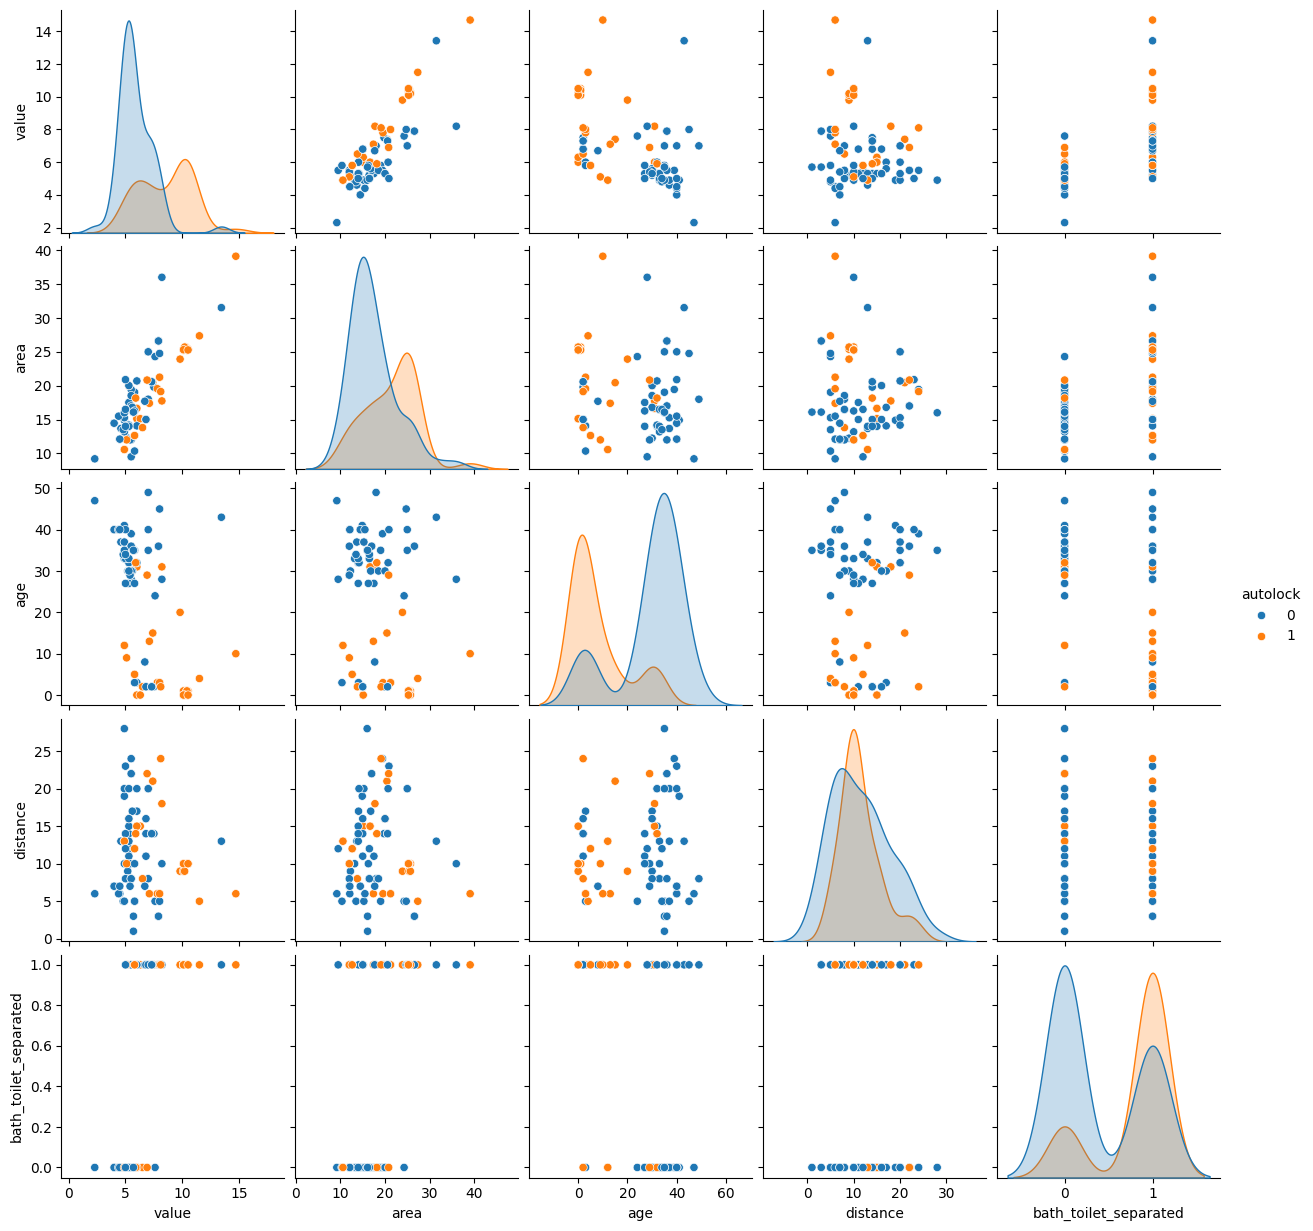

In [6]:
sns.pairplot(data=oneroom_train,hue="autolock")

In [11]:
feature_name = ["area", "age", "bath_toilet_separated"]
X_train = oneroom_train[feature_name].values
y_train = oneroom_train["value"].values


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

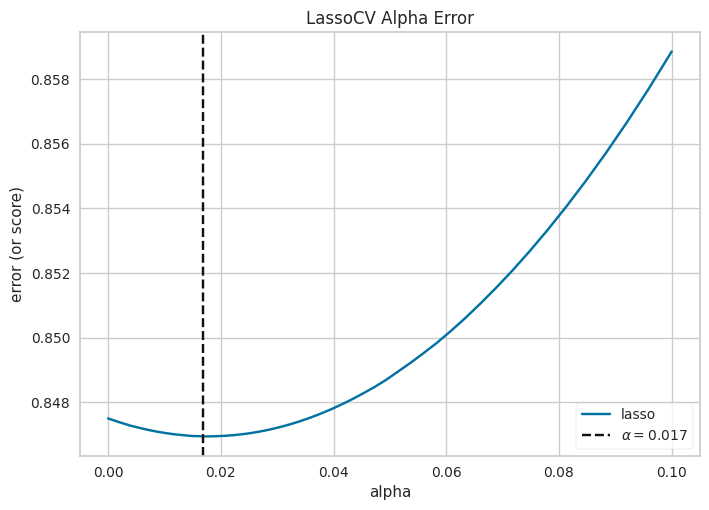

In [15]:
#ハイパーパラメーターαを求める式
from yellowbrick.regressor import AlphaSelection
from sklearn.linear_model import LassoCV
import numpy as np
alphas = np.logspace(-10, -1, 500)
model_cv = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model_cv)
visualizer.fit(X_train,y_train)
visualizer.show() 
plt.show()

In [16]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.017)
model.fit(X_train,y_train)



,alpha,0.017
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [17]:
model.intercept_,model.coef_

(np.float64(6.940299999999999), array([ 1.5948933 , -0.72409219,  0.21732711]))

In [18]:
pred_train = model.predict(X_train)

from sklearn.metrics import r2_score
r2_score(y_true=y_train,y_pred=pred_train)

0.8611372995397126

In [19]:
import pandas as pd
file_path_test = "/home/haruk/workspace/ml-workspace-202507/math/math_data/ogikubo_oneroom_test.csv"
oneroom_test = pd.read_csv(filepath_or_buffer=file_path_test)
oneroom_test.shape

(61, 7)

In [20]:
X_test = oneroom_test[feature_name].values
y_test = oneroom_test["value"].values
X_test = scaler.transform(X_test)
